In [57]:
# importing all the required libarires 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [58]:
# loaa our csv dataset
df = pd.read_csv("DMart_Grocery_Sales.csv")
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


# Now checking the information of our data and null values 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [9]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [10]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [60]:
# We have created a seprate colmn named Day. In which we extract the day name from the Order Date column. 
# It will help us to understand and analyse the data in a deeper way. 
df["Order Date"] = pd.to_datetime(df["Order Date"], format = "mixed")
#Now Creating coulmn of Day Name 
df["Day"] = df["Order Date"].dt.day_name()

In [61]:
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,Wednesday
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,Wednesday
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,Monday
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,Tuesday
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu,Thursday
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,Sunday
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,Tuesday
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu,Tuesday


In [14]:
# finding category wise sales 
category_sales = df.groupby("Category")["Sales"].sum().reset_index()
category_sales

,Category,Sales
0,Bakery,2112281
1,Beverages,2085313
2,"Eggs, Meat & Fish",2267401
3,Food Grains,2115272
4,Fruits & Veggies,2100727
5,Oil & Masala,2038442
6,Snacks,2237546


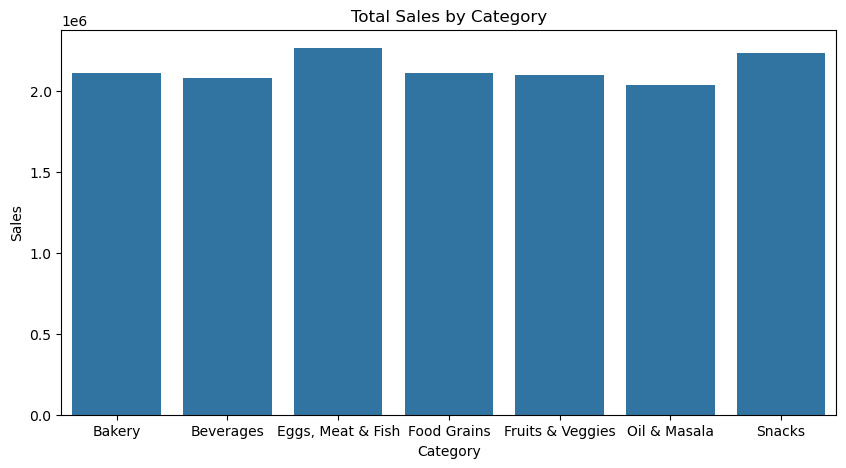

In [83]:
# plotting a bar garph for better understanding 
plt.figure(figsize=(10,5))
sns.barplot(x = "Category", y = "Sales", data = category_sales)
plt.xlabel = "Category"
plt.ylabel = "Sales"
plt.title("Total Sales by Category")
plt.show()

In [62]:
# sales according to city
city_sales = df.groupby("City")["Sales"].sum().reset_index()
city_sales.sort_values(by = "Sales", ascending = False, inplace = True)
city_sales

,City,Sales
6,Kanyakumari,706764
21,Vellore,676550
0,Bodi,667177
19,Tirunelveli,659812
13,Perambalur,659738
16,Salem,657093
14,Pudukottai,653179
17,Tenkasi,643652
7,Karur,642273
8,Krishnagiri,637273


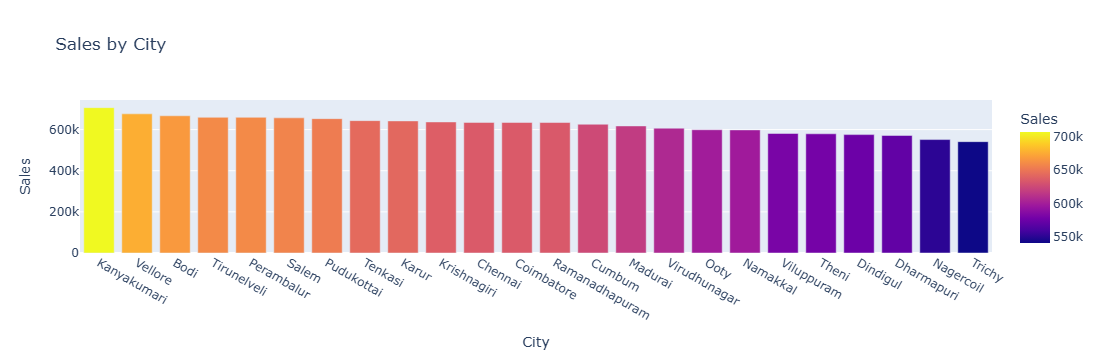

In [67]:
# plotting bar graph for representation sales by city
fig = px.bar(city_sales, x = "City", y = "Sales", color = "Sales", title = "Sales by City")
fig.show()

In [36]:
# sales by region 
region_by_purchase = df.groupby("Region")["Sales"].sum().reset_index()
region_by_purchase

,Region,Sales
0,Central,3468156
1,East,4248368
2,North,1254
3,South,2440461
4,West,4798743


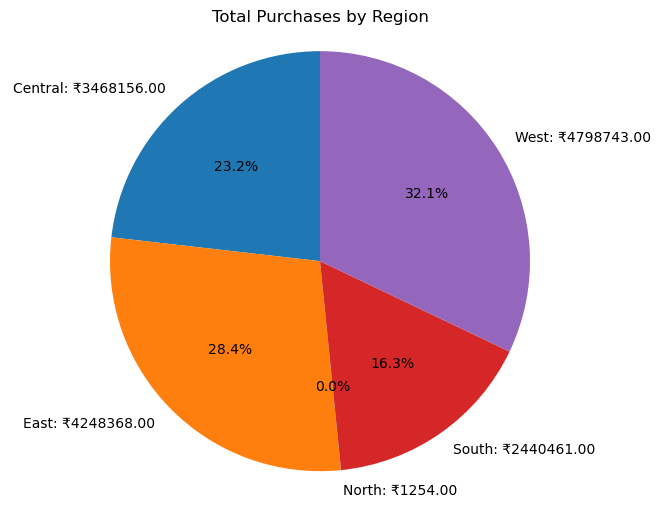

In [85]:
# sales by region representing by pie chart 
plt.figure(figsize=(8, 6))
# Create labels that include both region and sales amount
labels = [f'{row["Region"]}: ₹{row["Sales"]:.2f}' for index, row in region_by_purchase.iterrows()]
plt.pie(region_by_purchase['Sales'], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Total Purchases by Region')
plt.axis('equal')
plt.show()

In [71]:
#finding our top 10 customers
top_customer = df.groupby("Customer Name")["Sales"].sum().reset_index()
top_customer.sort_values(by = "Sales", ascending = False, inplace = True)
top_customer.head(10)

,Customer Name,Sales
19,Krithika,334361
4,Amrish,333351
42,Verma,331665
7,Arutra,325720
44,Vidya,321798
46,Vinne,319565
32,Shah,318588
39,Suresh,315973
0,Adavan,315341
40,Surya,312645


In [19]:
print(df["Customer Name"].unique())

['Harish' 'Sudha' 'Hussain' 'Jackson' 'Ridhesh' 'Adavan' 'Jonas' 'Hafiz'
 'Krithika' 'Ganesh' 'Yadav' 'Sharon' 'Peer' 'Sundar' 'Ramesh' 'Alan'
 'Arutra' 'Haseena' 'Verma' 'Muneer' 'Veronica' 'Shah' 'Mathew' 'Akash'
 'Anu' 'Sabeela' 'James' 'Willams' 'Malik' 'Amrish' 'Vince' 'Suresh'
 'Esther' 'Yusuf' 'Komal' 'Veena' 'Shree' 'Roshan' 'Sudeep' 'Vinne'
 'Vidya' 'Arvind' 'Kumar' 'Amy' 'Ravi' 'Sheeba' 'Ram' 'Rumaiza' 'Aditi'
 'Surya']


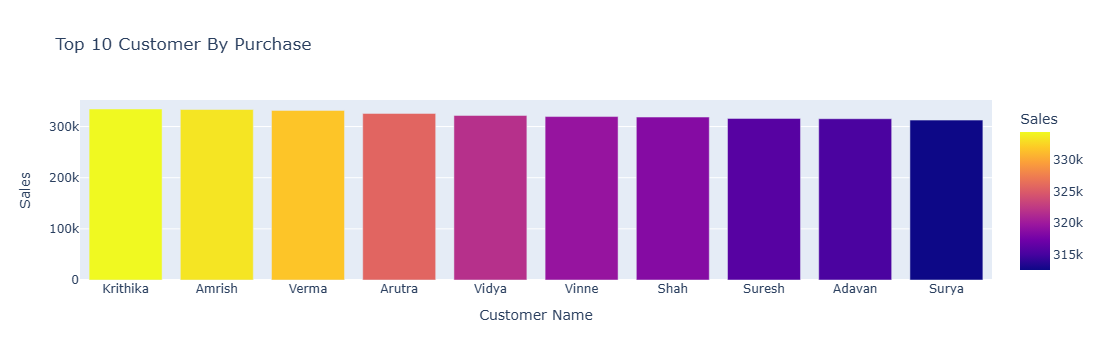

In [70]:
# finding which customer make more purchase 
fig = px.bar(top_customer.head(10), x = "Customer Name" , y = "Sales", color = "Sales", title = "Top 10 Customer By Purchase")
fig.show()

In [28]:
# Top 10 Sub-category Products making most profit
top_subcategory = df.groupby("Sub Category")["Profit"].sum().reset_index()
top_subcategory.sort_values(by = "Profit", ascending = False, inplace = True)
top_subcategory.head(10)

,Sub Category,Profit
13,Health Drinks,267469.79
21,Soft Drinks,258135.97
16,Noodles,193685.81
2,Breads & Buns,190764.98
6,Cookies,190643.70
5,Chocolates,183849.34
1,Biscuits,169357.62
14,Masalas,168999.11
8,Edible Oil & Ghee,168593.58
3,Cakes,168398.46


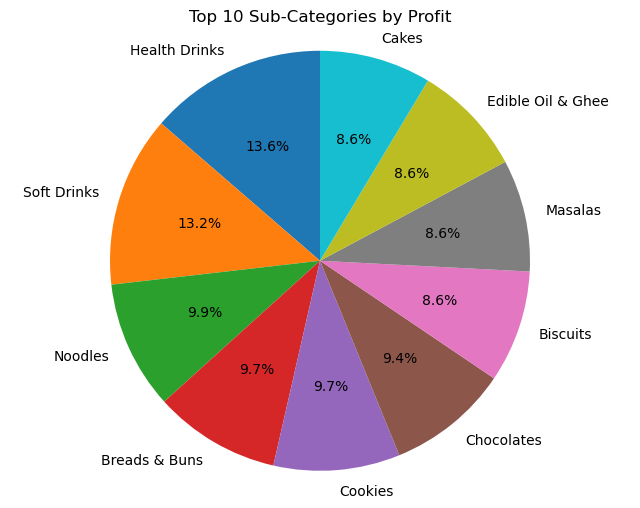

In [30]:
# plotting pie chart to show 10 sub-categories by profit
plt.figure(figsize=(8, 6))
plt.pie(top_subcategory.head(10)['Profit'], labels=top_subcategory.head(10)['Sub Category'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Sub-Categories by Profit')
plt.axis('equal')
plt.show()

Top 10 Sub-Categories by Total Discount Given:


,Sub Category,Total Discount Given
13,Health Drinks,166.49
21,Soft Drinks,155.97
6,Cookies,113.72
2,Breads & Buns,113.70
5,Chocolates,112.60
16,Noodles,109.86
14,Masalas,103.65
8,Edible Oil & Ghee,103.51
1,Biscuits,103.29
3,Cakes,101.54


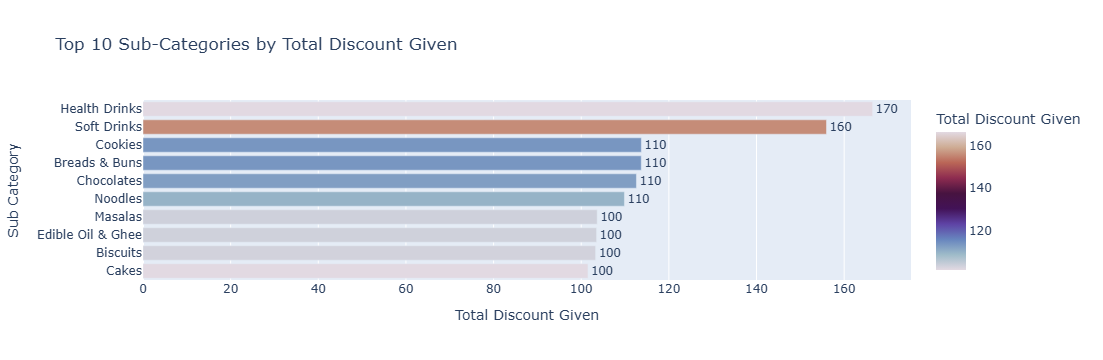

In [97]:
# find qich sub category is given more discount
# Group by Sub Category and calculate total discount
discount_by_subcategory = df.groupby('Sub Category')['Discount'].sum().reset_index()
discount_by_subcategory.columns = ['Sub Category', 'Total Discount Given']

# Sort by highest discounts
top_discounted_subcategories = discount_by_subcategory.sort_values(by='Total Discount Given', ascending=False).head(10)

# Display the top 10 discounted sub-categories
print("Top 10 Sub-Categories by Total Discount Given:")
display(top_discounted_subcategories)

# Plot the horizontal bar chart
fig = px.bar(top_discounted_subcategories, x='Total Discount Given', y='Sub Category', orientation='h',
             title='Top 10 Sub-Categories by Total Discount Given', text='Total Discount Given', color='Total Discount Given',
             color_continuous_scale='twilight')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


In [49]:
# finding which days are most busiest
peak_days = df.groupby("Day")["Sales"].sum().reset_index()
peak_days.sort_values(by="Sales", ascending = False, inplace = True)
peak_days

,Day,Sales
5,Tuesday,2855751
2,Saturday,2724409
3,Sunday,2615647
1,Monday,2428324
6,Wednesday,1886849
0,Friday,1638367
4,Thursday,807635


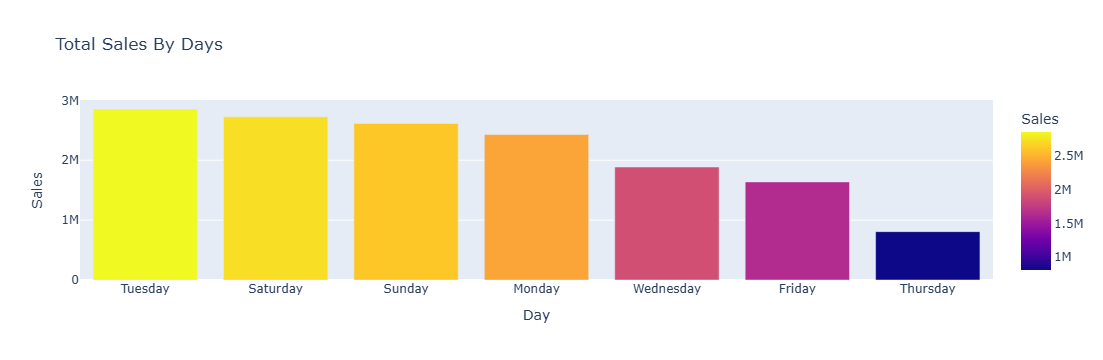

In [50]:
# plotting bar graph to represent most selling day 
fig = px.bar(peak_days, x = "Day", y = "Sales", color = "Sales", title = "Total Sales By Days")
fig.show()

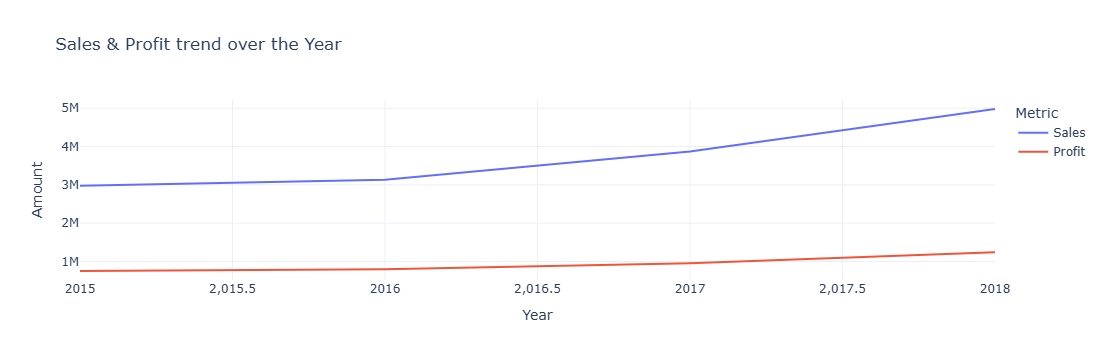

In [75]:
# finding & representing the trend between Sales & Profit over Years
df["Year"] = df["Order Date"].dt.year
yearly_summary = df.groupby("Year").agg({"Sales" : "sum", "Profit" : "sum"}).reset_index()
fig = px.line(yearly_summary, x = "Year", y = ["Sales", "Profit"], title = "Sales & Profit trend over the Year",  
labels={'value': 'Amount', 'variable': 'Metric'})
fig.update_layout(xaxis_title='Year', yaxis_title='Amount', legend_title='Metric', template='plotly_white')

fig.show()
